EDA Criptomonedas

Comenzamos importando las librerias necesarias y agregando algunas configuraciones

In [337]:
import pandas as pd
import requests
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mplfinance as mpf

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format

Extraemos la data que vamos a trabajar, para esto utilizamos la libreria requests y creamos una funcion para consumir la api de Coingecko

In [758]:
url_coins = {
"BTC" : 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=731&interval=daily',
"ETH": 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=731&interval=daily',
"USDT": 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=731&interval=daily', 
"BNB": 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=731&interval=daily', 
"XRP" : 'https://api.coingecko.com/api/v3/coins/ripple/market_chart?vs_currency=usd&days=731&interval=daily',
"USDC": 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=731&interval=daily',
"STETH": 'https://api.coingecko.com/api/v3/coins/staked-ether/market_chart?vs_currency=usd&days=731&interval=daily',
"DOGE": 'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=usd&days=731&interval=daily',
"ADA": 'https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days=731&interval=daily',
"SOL": 'https://api.coingecko.com/api/v3/coins/solana/market_chart?vs_currency=usd&days=731&interval=daily',
}


In [842]:
url_ohlc = {
    'BTC': 'https://api.coingecko.com/api/v3/coins/bitcoin/ohlc?vs_currency=usd&days=max',
    'ETH': 'https://api.coingecko.com/api/v3/coins/ethereum/ohlc?vs_currency=usd&days=max',
    'USDT': 'https://api.coingecko.com/api/v3/coins/tether/ohlc?vs_currency=usd&days=max',
    'BNB': 'https://api.coingecko.com/api/v3/coins/binancecoin/ohlc?vs_currency=usd&days=max',
    'XRP': 'https://api.coingecko.com/api/v3/coins/ripple/ohlc?vs_currency=usd&days=max',
    'USDC': 'https://api.coingecko.com/api/v3/coins/usd-coin/ohlc?vs_currency=usd&days=max',
    'STETH': 'https://api.coingecko.com/api/v3/coins/staked-ether/ohlc?vs_currency=usd&days=max',
    'DOGE': 'https://api.coingecko.com/api/v3/coins/dogecoin/ohlc?vs_currency=usd&days=max',
    'ADA': 'https://api.coingecko.com/api/v3/coins/cardano/ohlc?vs_currency=usd&days=max',
    'SOL': 'https://api.coingecko.com/api/v3/coins/solana/ohlc?vs_currency=usd&days=max'
}

In [756]:
def get_data(input_url):
    response = requests.get(input_url)
    data = pd.DataFrame(response.json())
    return data 

In [757]:
market = get_data('https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=250&page=1&sparkline=false&locale=en')

In [790]:
all_coins = []

for coin, url in url_coins.items():
    data_coin = get_data(url)
    data_coin['cripto'] = coin
    all_coins.append(data_coin)

coins_prices = pd.concat(all_coins, keys=url_coins.keys()).reset_index(level=0, drop=True)
coins_prices = coins_prices.reset_index(level=0, drop=True)

En base al siguiente dataframe, decido basar el analisis de criptomonedas en el top 10 con mayor capitalización de mercado

In [1054]:
market.head(10)

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,29201.000000,568130648135,1,613135746209.000000,11933516917.000000,29409.000000,29119.000000,-187.452822,-0.637860,-4156810803.086914,-0.726350,19458568.000000,21000000.000000,21000000.000000,69045.000000,-57.713710,2021-11-10T14:24:11.849Z,67.810000,42956.927030,2013-07-06T00:00:00.000Z,2023-08-16T01:28:12.256Z
1,ethereum,eth,Ethereum,1828.120000,219511697129,2,219511697129.000000,5764351564.000000,1844.840000,1818.530000,-16.718670,-0.906240,-2212098480.105560,-0.997680,120142222.589507,120142222.589507,NaN,4878.260000,-62.548430,2021-11-10T14:24:19.604Z,0.432979,421857.156910,2015-10-20T00:00:00.000Z,2023-08-16T01:28:10.078Z
2,tether,usdt,Tether,0.998722,83102970276,3,83102970276.000000,12212445509.000000,1.001000,0.996782,-0.000072,-0.007210,-210514787.303558,-0.252680,83182001730.369293,83182001730.369293,NaN,1.320000,-24.491460,2018-07-24T00:00:00.000Z,0.572521,74.500130,2015-03-02T00:00:00.000Z,2023-08-16T01:25:00.395Z
3,binancecoin,bnb,BNB,236.480000,36368979513,4,47276601570.000000,483348458.000000,240.190000,235.560000,-3.711986,-1.545450,-601505179.947594,-1.626990,153856150.000000,153856150.000000,200000000.000000,686.310000,-65.557230,2021-05-10T07:24:17.097Z,0.039818,593563.181310,2017-10-19T00:00:00.000Z,2023-08-16T01:28:04.131Z
4,ripple,xrp,XRP,0.608174,32104100720,5,60817867508.000000,1245548804.000000,0.631126,0.596803,-0.021840,-3.466570,-1202058665.445831,-3.609120,52787284454.000000,99988519823.000000,100000000000.000000,3.400000,-82.108970,2018-01-07T00:00:00.000Z,0.002686,22534.806950,2014-05-22T00:00:00.000Z,2023-08-16T01:28:06.041Z
5,usd-coin,usdc,USD Coin,0.999951,26032326268,6,26032367501.000000,2532158469.000000,1.002000,0.998887,0.000357,0.035720,-5291913.801865,-0.020320,26031291572.138000,26031332802.707699,NaN,1.170000,-14.732090,2019-05-08T00:40:28.300Z,0.877647,13.934460,2023-03-11T08:02:13.981Z,2023-08-16T01:28:06.355Z
6,staked-ether,steth,Lido Staked Ether,1826.610000,14855582872,7,14855582872.000000,18254569.000000,1843.090000,1817.060000,-16.362031,-0.887810,-91461554.811579,-0.611900,8131606.876576,8131606.876576,8131606.876576,4829.570000,-62.172070,2021-11-10T14:40:47.256Z,482.900000,278.326930,2020-12-22T04:08:21.854Z,2023-08-16T01:28:09.745Z
7,dogecoin,doge,Dogecoin,0.071108,9990803174,8,9990787541.000000,529251371.000000,0.074898,0.070727,-0.003609,-4.830140,-517737648.230322,-4.926830,140606856383.704987,140606636383.704987,NaN,0.731578,-90.287510,2021-05-08T05:08:23.458Z,0.000087,81662.272450,2015-05-06T00:00:00.000Z,2023-08-16T01:28:04.915Z
8,cardano,ada,Cardano,0.281726,9864605227,9,12666770477.000000,185471733.000000,0.290171,0.279226,-0.008445,-2.910350,-314430001.983809,-3.089000,35045020830.323402,45000000000.000000,45000000000.000000,3.090000,-90.881250,2021-09-02T06:00:10.474Z,0.019253,1362.065370,2020-03-13T02:22:55.044Z,2023-08-16T01:28:11.565Z
9,solana,sol,Solana,23.920000,9709916511,10,13262816683.000000,457758893.000000,25.070000,23.760000,-1.115471,-4.455520,-484808997.602365,-4.755490,406274773.652365,554932458.955335,NaN,259.960000,-90.800060,2021-11-06T21:54:35.825Z,0.500801,4675.568500,2020-05-11T19:35:23.449Z,2023-08-16T01:28:07.859Z


In [806]:
market = market.loc[:9]
market = market.drop(['image', 'roi'], axis=1)

In [807]:
market

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,29201.000000,568130648135,1,613135746209.000000,11933516917.000000,29409.000000,29119.000000,-187.452822,-0.637860,-4156810803.086914,-0.726350,19458568.000000,21000000.000000,21000000.000000,69045.000000,-57.713710,2021-11-10T14:24:11.849Z,67.810000,42956.927030,2013-07-06T00:00:00.000Z,2023-08-16T01:28:12.256Z
1,ethereum,eth,Ethereum,1828.120000,219511697129,2,219511697129.000000,5764351564.000000,1844.840000,1818.530000,-16.718670,-0.906240,-2212098480.105560,-0.997680,120142222.589507,120142222.589507,NaN,4878.260000,-62.548430,2021-11-10T14:24:19.604Z,0.432979,421857.156910,2015-10-20T00:00:00.000Z,2023-08-16T01:28:10.078Z
2,tether,usdt,Tether,0.998722,83102970276,3,83102970276.000000,12212445509.000000,1.001000,0.996782,-0.000072,-0.007210,-210514787.303558,-0.252680,83182001730.369293,83182001730.369293,NaN,1.320000,-24.491460,2018-07-24T00:00:00.000Z,0.572521,74.500130,2015-03-02T00:00:00.000Z,2023-08-16T01:25:00.395Z
3,binancecoin,bnb,BNB,236.480000,36368979513,4,47276601570.000000,483348458.000000,240.190000,235.560000,-3.711986,-1.545450,-601505179.947594,-1.626990,153856150.000000,153856150.000000,200000000.000000,686.310000,-65.557230,2021-05-10T07:24:17.097Z,0.039818,593563.181310,2017-10-19T00:00:00.000Z,2023-08-16T01:28:04.131Z
4,ripple,xrp,XRP,0.608174,32104100720,5,60817867508.000000,1245548804.000000,0.631126,0.596803,-0.021840,-3.466570,-1202058665.445831,-3.609120,52787284454.000000,99988519823.000000,100000000000.000000,3.400000,-82.108970,2018-01-07T00:00:00.000Z,0.002686,22534.806950,2014-05-22T00:00:00.000Z,2023-08-16T01:28:06.041Z
5,usd-coin,usdc,USD Coin,0.999951,26032326268,6,26032367501.000000,2532158469.000000,1.002000,0.998887,0.000357,0.035720,-5291913.801865,-0.020320,26031291572.138000,26031332802.707699,NaN,1.170000,-14.732090,2019-05-08T00:40:28.300Z,0.877647,13.934460,2023-03-11T08:02:13.981Z,2023-08-16T01:28:06.355Z
6,staked-ether,steth,Lido Staked Ether,1826.610000,14855582872,7,14855582872.000000,18254569.000000,1843.090000,1817.060000,-16.362031,-0.887810,-91461554.811579,-0.611900,8131606.876576,8131606.876576,8131606.876576,4829.570000,-62.172070,2021-11-10T14:40:47.256Z,482.900000,278.326930,2020-12-22T04:08:21.854Z,2023-08-16T01:28:09.745Z
7,dogecoin,doge,Dogecoin,0.071108,9990803174,8,9990787541.000000,529251371.000000,0.074898,0.070727,-0.003609,-4.830140,-517737648.230322,-4.926830,140606856383.704987,140606636383.704987,NaN,0.731578,-90.287510,2021-05-08T05:08:23.458Z,0.000087,81662.272450,2015-05-06T00:00:00.000Z,2023-08-16T01:28:04.915Z
8,cardano,ada,Cardano,0.281726,9864605227,9,12666770477.000000,185471733.000000,0.290171,0.279226,-0.008445,-2.910350,-314430001.983809,-3.089000,35045020830.323402,45000000000.000000,45000000000.000000,3.090000,-90.881250,2021-09-02T06:00:10.474Z,0.019253,1362.065370,2020-03-13T02:22:55.044Z,2023-08-16T01:28:11.565Z
9,solana,sol,Solana,23.920000,9709916511,10,13262816683.000000,457758893.000000,25.070000,23.760000,-1.115471,-4.455520,-484808997.602365,-4.755490,406274773.652365,554932458.955335,NaN,259.960000,-90.800060,2021-11-06T21:54:35.825Z,0.500801,4675.568500,2020-05-11T19:35:23.449Z,2023-08-16T01:28:07.859Z


In [10]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   current_price                     10 non-null     float64
 4   market_cap                        10 non-null     int64  
 5   market_cap_rank                   10 non-null     int64  
 6   fully_diluted_valuation           10 non-null     float64
 7   total_volume                      10 non-null     float64
 8   high_24h                          10 non-null     float64
 9   low_24h                           10 non-null     float64
 10  price_change_24h                  10 non-null     float64
 11  price_change_percentage_24h       10 non-null     float64
 12  market_cap_

Ahora obtenemos el precio, capitalizacion y volumen de las 10 criptomonedas elegidas para el analisis

In [791]:
coins_prices.head()

,prices,market_caps,total_volumes,cripto
0,"[1629072000000, 47025.00323011282]","[1629072000000, 882888202377.7089]","[1629072000000, 32863850458.005253]",BTC
1,"[1629158400000, 46031.75754362583]","[1629158400000, 866391335029.3693]","[1629158400000, 34221605780.00136]",BTC
2,"[1629244800000, 44534.454854219905]","[1629244800000, 836777066605.9799]","[1629244800000, 34488116651.18446]",BTC
3,"[1629331200000, 45015.46554608543]","[1629331200000, 847143004614.999]","[1629331200000, 34668999387.83819]",BTC
4,"[1629417600000, 46745.03462296988]","[1629417600000, 867650725472.864]","[1629417600000, 38434805722.952705]",BTC


In [794]:
coins_prices['timestamp'] = coins_prices['prices'].apply(lambda x: x[0])
coins_prices['prices'] = coins_prices['prices'].apply(lambda x: x[1])
coins_prices['market_caps'] = coins_prices['market_caps'].apply(lambda x: x[1])
coins_prices['total_volumes'] = coins_prices['total_volumes'].apply(lambda x: x[1])
coins_prices['date'] = pd.to_datetime(coins_prices['timestamp'], unit='ms').dt.date
coins_prices = coins_prices.drop('timestamp', axis=1)
coins_prices = coins_prices.drop_duplicates(subset='date', keep='first')

In [804]:
coins_prices.sample(5)

,prices,market_caps,total_volumes,cripto,date
4656,2696.452812,10977591794.970528,17301375.832127,STETH,2022-05-07
7171,22.740206,8718952337.679441,725964027.593170,SOL,2023-03-22
4264,1.000405,32413088278.676300,3845052927.429685,USDC,2023-04-12
4427,3306.743817,4256184677.313140,3188276.599414,STETH,2021-09-20
1372,1821.050635,219124262711.374023,6647945218.371790,ETH,2023-05-18


In [801]:
coins_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         7320 non-null   float64
 1   market_caps    7320 non-null   float64
 2   total_volumes  7320 non-null   float64
 3   cripto         7320 non-null   object 
 4   date           7320 non-null   object 
dtypes: float64(3), object(2)
memory usage: 286.1+ KB


Esta funcion servira para graficar el precio, la capitalizacion y volumen de cada moneda, para entender su distribucion y comportamiento de los ultimos dos años 

In [1055]:
def plot_crypto_analysis(data, crypto_name):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Análisis de {crypto_name}: Precios, Capitalización y Volúmenes', fontsize=16)

    plt.subplot(1, 3, 1)
    sns.violinplot(data=data[data['cripto'] == crypto_name], y='prices')
    plt.xlabel(None)
    plt.ylabel('Precio')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 2)
    sns.lineplot(data=data[data['cripto'] == crypto_name], x='date', y='market_caps')
    plt.xlabel(None)
    plt.ylabel('Capitalización')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    sns.lineplot(data=data[data['cripto'] == crypto_name], x='date', y='total_volumes')
    plt.xlabel(None)
    plt.ylabel('Volumen')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

Bitcoin

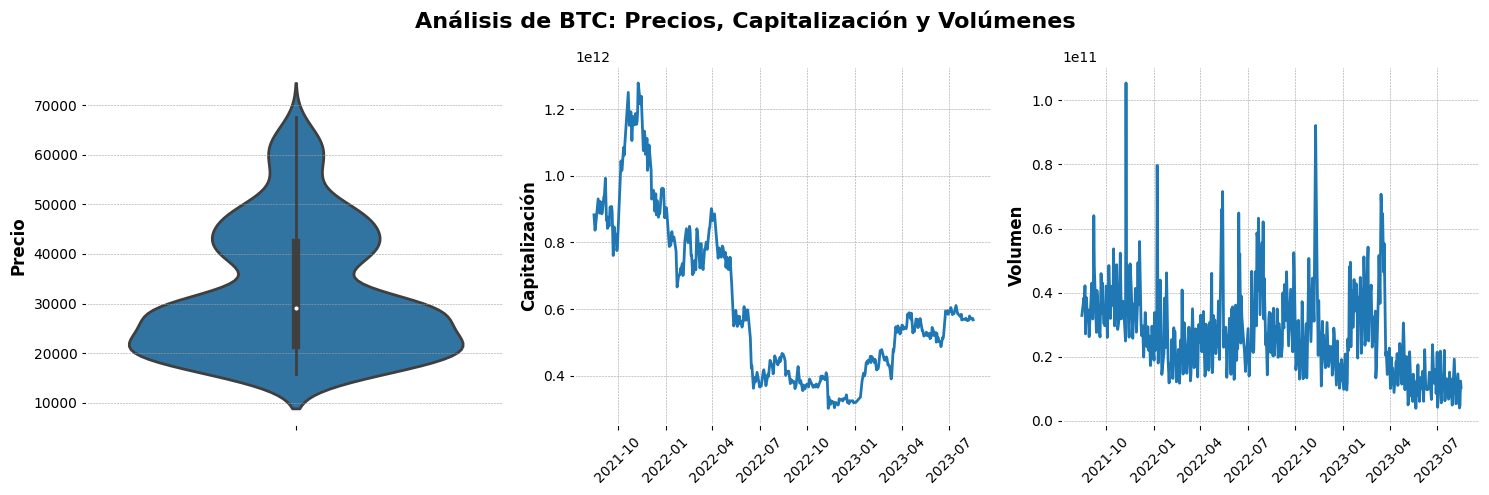

In [1056]:
plot_crypto_analysis(coins_prices, 'BTC')

Ethereum

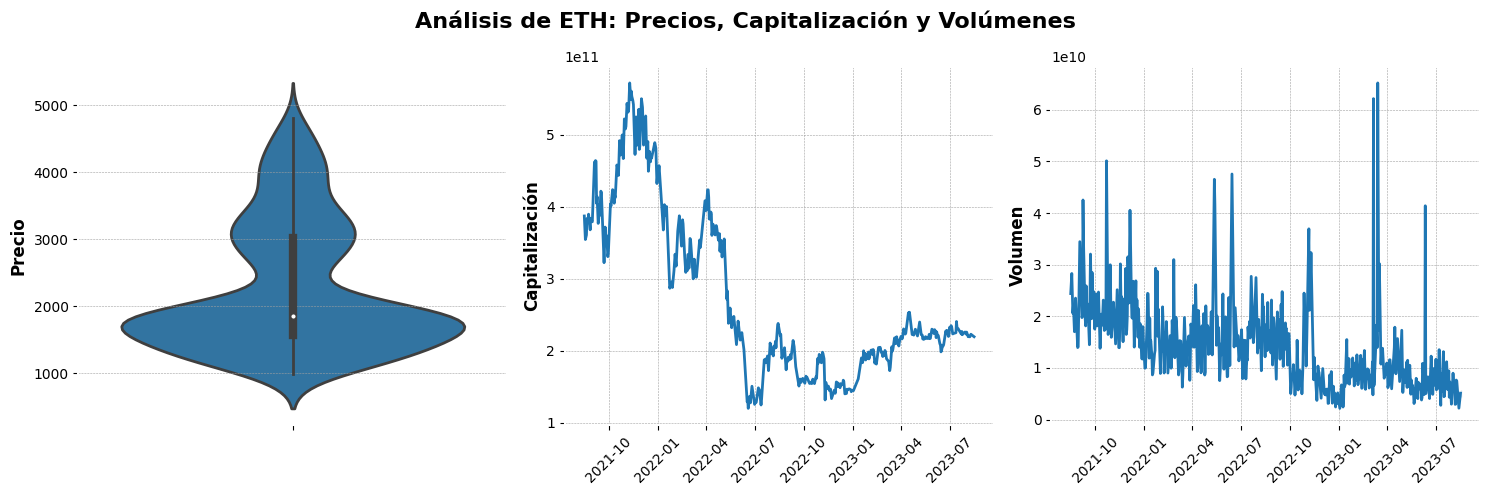

In [1057]:
plot_crypto_analysis(coins_prices, 'ETH')

USDT

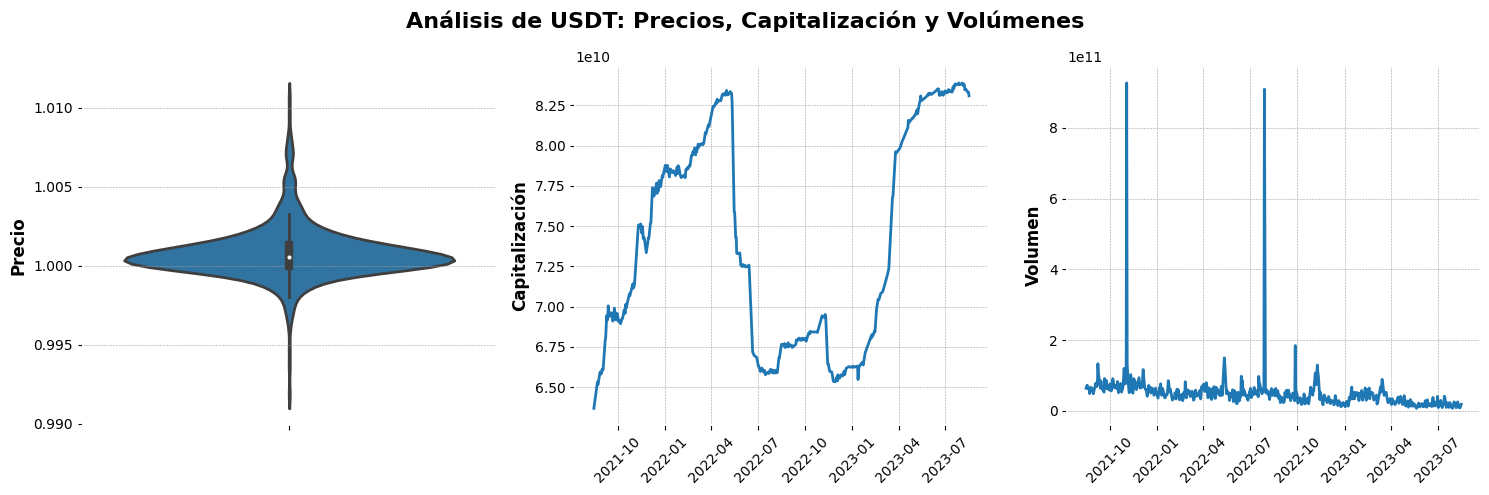

In [1058]:
plot_crypto_analysis(coins_prices, 'USDT')

BNB

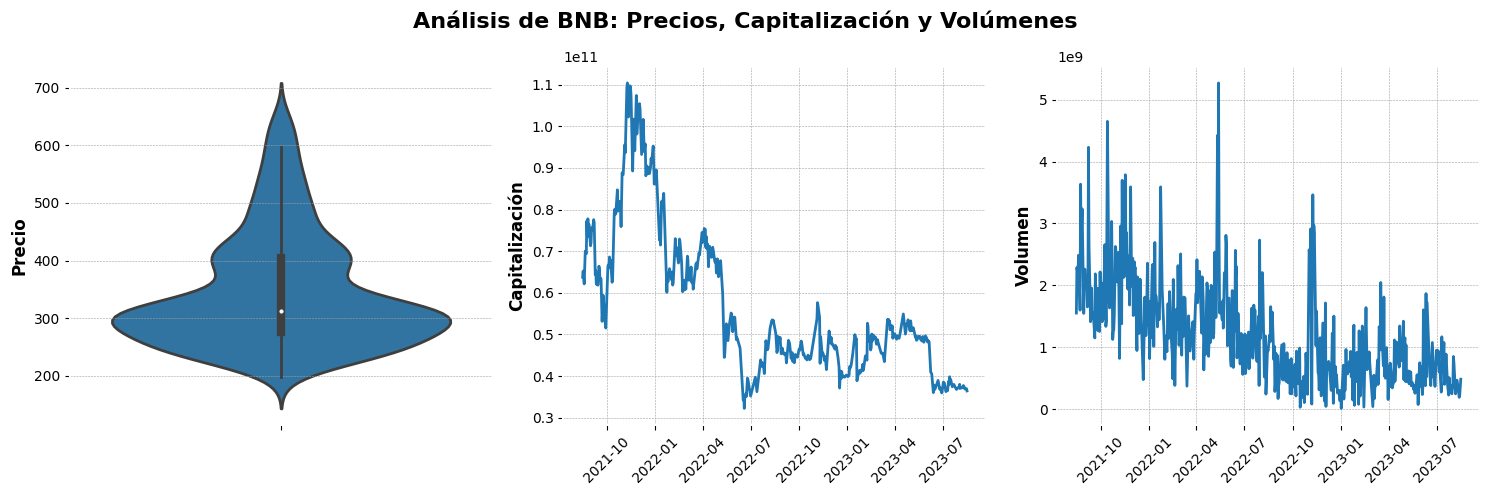

In [1059]:
plot_crypto_analysis(coins_prices, 'BNB')

XRP

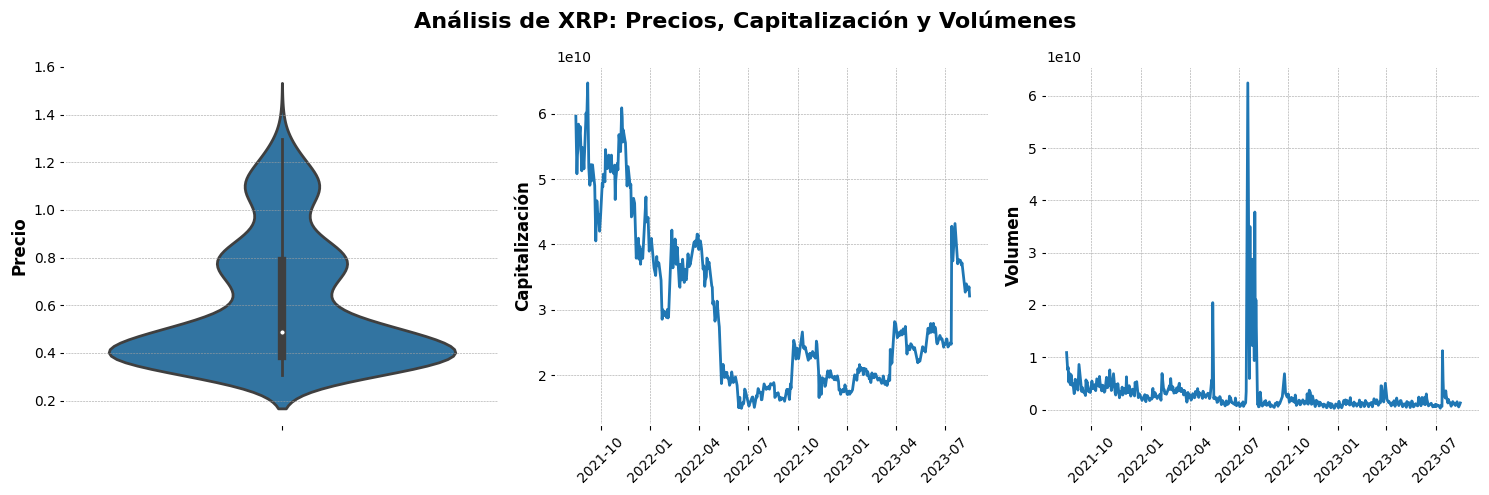

In [1065]:
plot_crypto_analysis(coins_prices, 'XRP')

USD Coin

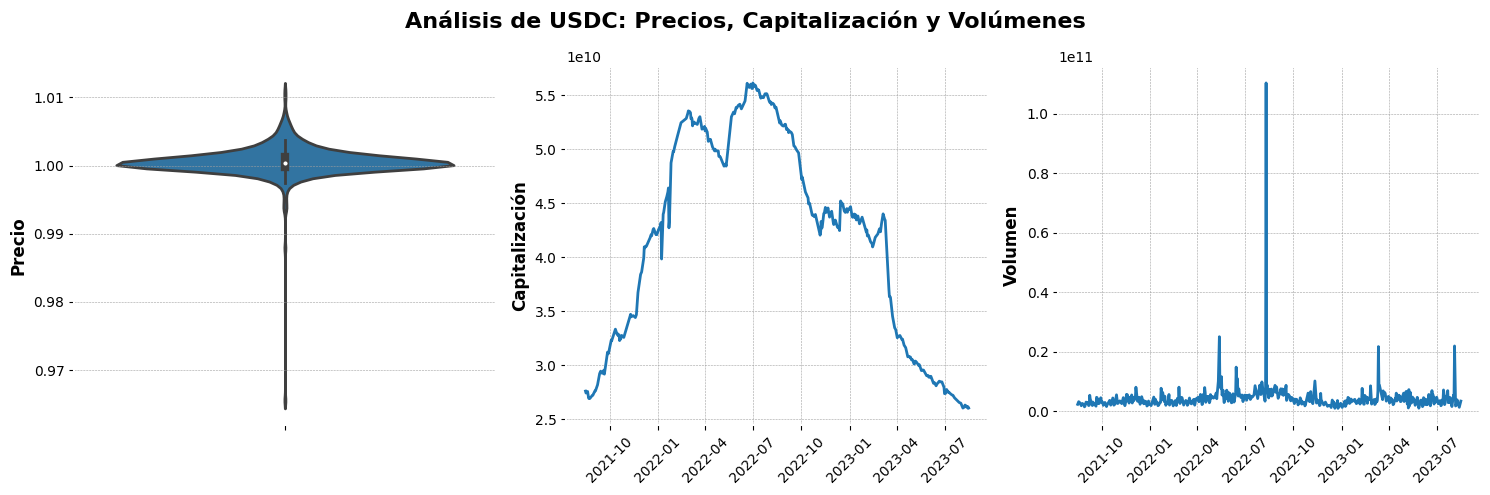

In [1066]:
plot_crypto_analysis(coins_prices, 'USDC')

Lido Staked Ether

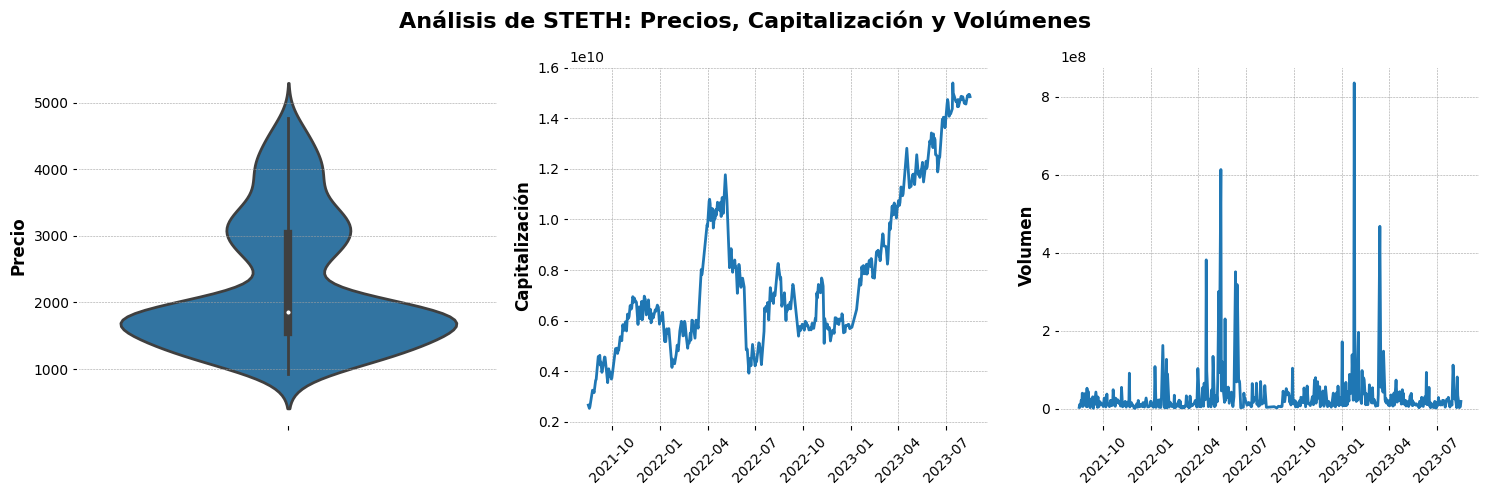

In [1068]:
plot_crypto_analysis(coins_prices, 'STETH')

Dogecoin

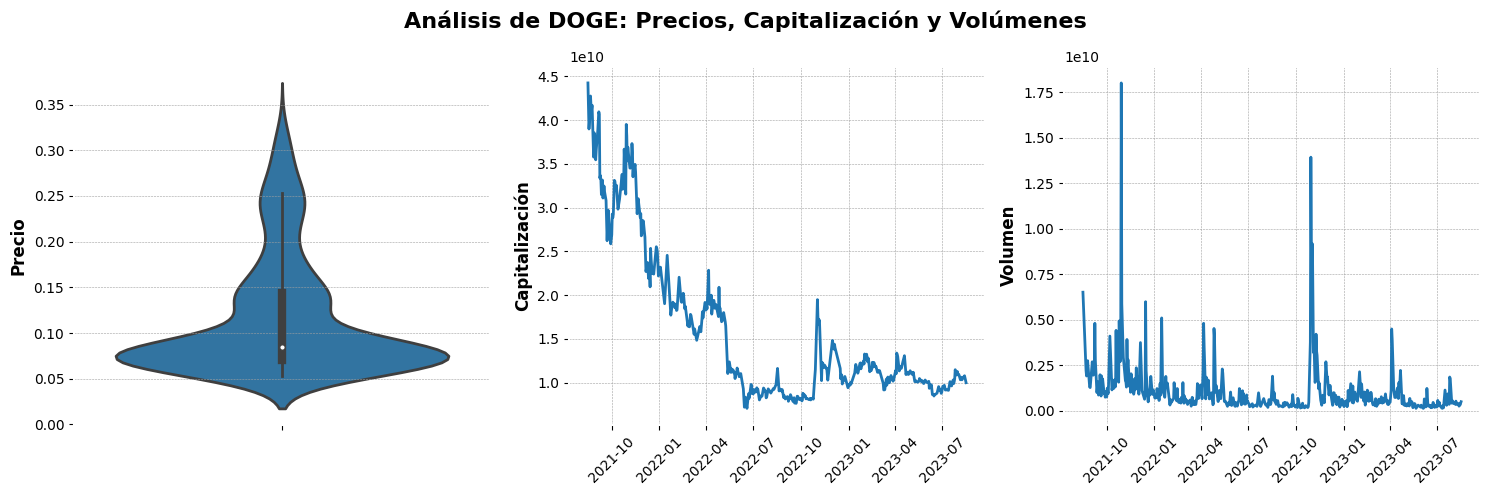

In [1062]:
plot_crypto_analysis(coins_prices, 'DOGE')

Cardano

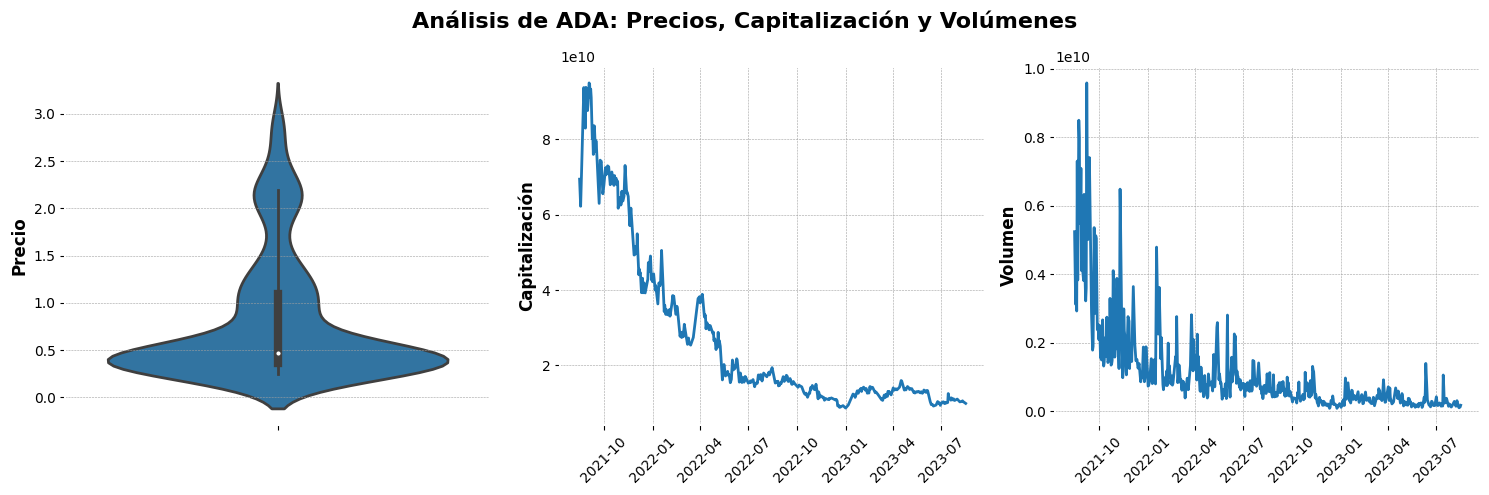

In [1063]:
plot_crypto_analysis(coins_prices, 'ADA')

Solana

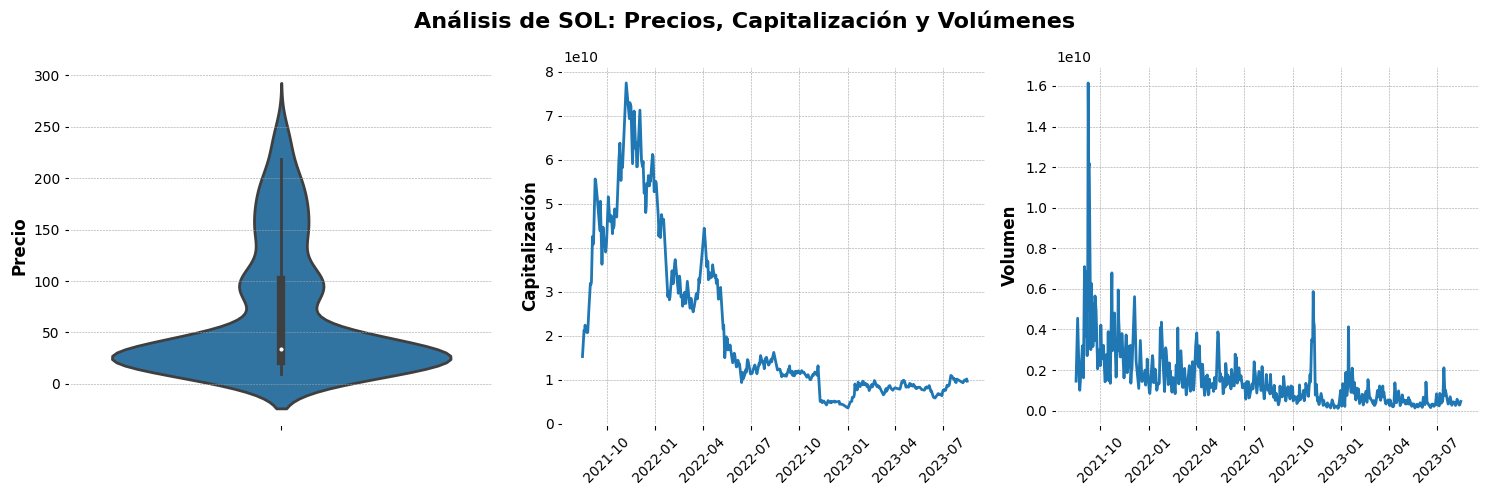

In [1064]:
plot_crypto_analysis(coins_prices, 'SOL')

Gracias a estos gráficos, podemos obtener una comprensión más profunda de cómo se distribuyen los precios de las monedas digitales, su capitalización de mercado y el volumen de transacciones de cada una a lo largo de los últimos dos años. El primer gráfico de violín nos proporciona un indicio de la densidad de precios, revelando que la mayoría de las monedas tienen una densidad más alta en los rangos de precios más bajos y una densidad menor en los rangos de precios más altos. Esto sugiere una distribución sesgada, donde en ocasiones se observan precios más elevados. Este detalle es relevante para un análisis más exhaustivo posterior.

Por otro lado, debemos considerar las stablecoins, como USDT y USD-Coin, en las que la densidad de precios se concentra alrededor del valor de 1. Esto es coherente con las características fundamentales de estas monedas y lo que representan en el mercado.

Al analizar la capitalización de mercado, podemos identificar diversas tendencias. Algunas monedas, como Cardano, han experimentado una disminución en su capitalización, mientras que otras han logrado recuperarse en el último año tras enfrentar caídas significativas, ejemplificadas por Bitcoin, Ethereum, XRP. Además, hay monedas que han experimentado un aumento reciente en su capitalización, como Lido Staked Ether y USDT.

En cuanto al volumen de transacciones, se pueden distinguir dos grupos. Por un lado, las monedas que han mantenido cierta estabilidad a pesar de algunos picos en su volumen, como Dogecoin y Steth. Por otro lado, encontramos monedas que han experimentado una disminución en su volumen de transacciones.

Estos hallazgos sirven como partida para seguir analizando el comportamiento de mercado de estas criptomonedas y posteriormente en Power Bi 

Correlación entre el precio de las criptomonedas

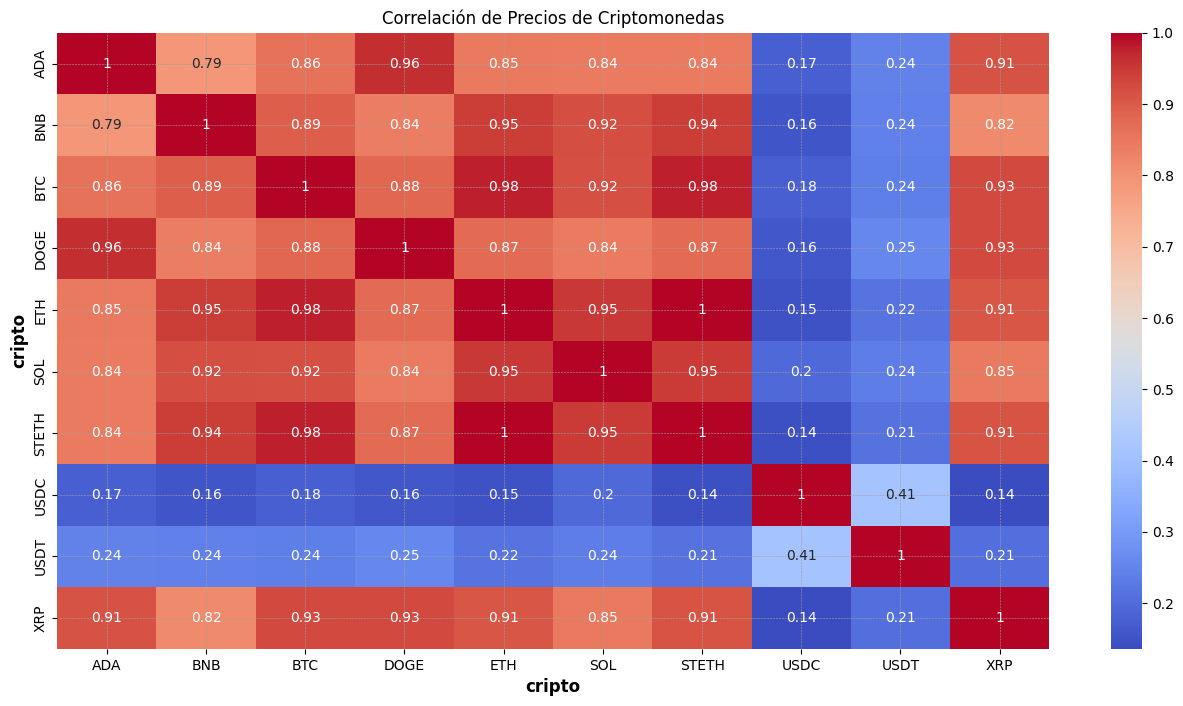

In [841]:
correlation_matrix = coins_prices.pivot_table(index='date', columns='cripto', values='prices')

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de Precios de Criptomonedas')
plt.show()

Este grafico nos muestra que existe una alta correlacion entre el precio de las distintas monedas, menos de las stablecoin, esto es asi debido a que estas ultimas representan el valor de 1 dolar estadounidense, por lo que si bien pueden ser influenciadas por otros factoren tienen la misma volatilidad que el dolar.
En cambio las demas cripto, estan altamente correlacionadas lo que indica que el aumento o disminucion de una afectara a las demas.

A continuacion se exportan los datos OHLC de las diferentes criptomonedas para analizar en detalle el comportamiento de Precios desde sus inicios.

Esta funcion procesa los datos para facilitar el analisis, luego se genera un dataframe por cada criptomoneda

In [1005]:
def preprocess_ohlc_data(df):
    df['Date'] = pd.to_datetime(df[0], unit='ms')
    df.set_index('Date', inplace=True)
    df['date'] = pd.to_datetime(df[0], unit='ms')
    df = df.drop(0, axis=1)
    df = df.rename(columns={1: 'Open', 2: 'High', 3: 'Low', 4: 'Close'})
    return df

In [1006]:
ohlc_dataframes = []

for coin, url in url_ohlc.items():
    data_ohlc = get_data(url)
    data_ohlc['cripto'] = coin
    data_ohlc = preprocess_ohlc_data(data_ohlc)
    ohlc_dataframes.append(data_ohlc)

Primero observamos un poco los datos de cada cripto, tipos de datos, cantidad, datos estadisticos, para que nos ayuden a comprender mejor la distribucion de los precios

Bitcoin

In [1007]:
btc_ohlc = ohlc_dataframes[0]
btc_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2013-04-30,135.300000,141.960000,135.300000,135.300000,BTC,2013-04-30
2013-05-03,117.000000,117.000000,91.010000,91.010000,BTC,2013-05-03
2013-05-07,111.250000,118.330000,106.400000,106.400000,BTC,2013-05-07
2013-05-11,112.640000,118.780000,112.640000,113.010000,BTC,2013-05-11
2013-05-15,114.710000,117.180000,114.160000,114.160000,BTC,2013-05-15


In [1008]:
btc_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2013-04-30 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    982 non-null    float64       
 1   High    982 non-null    float64       
 2   Low     982 non-null    float64       
 3   Close   982 non-null    float64       
 4   cripto  982 non-null    object        
 5   date    982 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 53.7+ KB


In [1009]:
btc_ohlc.describe()

,Open,High,Low,Close,date
count,982.000000,982.000000,982.000000,982.000000,982
mean,11991.962413,12342.722688,11641.784572,12006.625642,2018-06-23 22:29:05.010183168
min,77.500000,78.800000,67.810000,68.080000,2013-04-30 00:00:00
25%,568.405000,584.635000,559.547500,569.720000,2015-11-27 18:00:00
50%,6393.005000,6490.725000,6246.500000,6367.025000,2018-06-25 00:00:00
75%,17316.250000,18454.300000,17068.962500,17941.455000,2021-01-18 00:00:00
max,65006.000000,67617.000000,64432.000000,65649.000000,2023-08-19 00:00:00
std,15588.870203,16031.158247,15113.610166,15567.310715,NaN


Ethereum

In [1012]:
eth_ohlc = ohlc_dataframes[1]
eth_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2015-08-07,2.830000,2.830000,2.830000,2.830000,ETH,2015-08-07
2015-08-11,1.330000,1.330000,0.687586,1.067000,ETH,2015-08-11
2015-08-15,1.260000,1.830000,1.260000,1.670000,ETH,2015-08-15
2015-08-19,1.480000,1.480000,1.200000,1.250000,ETH,2015-08-19
2015-08-23,1.480000,1.480000,1.360000,1.360000,ETH,2015-08-23


In [1013]:
eth_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2015-08-07 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    766 non-null    float64       
 1   High    766 non-null    float64       
 2   Low     766 non-null    float64       
 3   Close   766 non-null    float64       
 4   cripto  766 non-null    object        
 5   date    766 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 41.9+ KB


In [1014]:
eth_ohlc.describe()

,Open,High,Low,Close,date
count,766.000000,766.000000,766.000000,766.000000,766
mean,878.372137,909.799559,846.093249,878.822102,2019-08-12 00:43:14.255874560
min,0.432979,0.549028,0.432979,0.487067,2015-08-07 00:00:00
25%,125.055000,132.225000,121.620000,126.207500,2017-08-08 00:00:00
50%,299.835000,309.825000,292.495000,302.700000,2019-08-13 00:00:00
75%,1554.892500,1613.757500,1516.302500,1566.652500,2021-08-14 00:00:00
max,4732.920000,4815.000000,4652.950000,4652.950000,2023-08-19 00:00:00
std,1096.262362,1130.766547,1055.578546,1092.526259,NaN


USDT

In [1015]:
usdt_ohlc = ohlc_dataframes[2]
usdt_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2015-02-27,1.210000,1.210000,1.210000,1.210000,USDT,2015-02-27
2015-03-03,0.572521,0.572521,0.572521,0.572521,USDT,2015-03-03
2015-03-07,1.000000,1.000000,1.000000,1.000000,USDT,2015-03-07
2015-03-11,1.000000,1.000000,1.000000,1.000000,USDT,2015-03-11
2015-03-15,1.000000,1.000000,1.000000,1.000000,USDT,2015-03-15


In [1016]:
usdt_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 806 entries, 2015-02-27 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    806 non-null    float64       
 1   High    806 non-null    float64       
 2   Low     806 non-null    float64       
 3   Close   806 non-null    float64       
 4   cripto  806 non-null    object        
 5   date    806 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 44.1+ KB


In [1017]:
usdt_ohlc.describe()

,Open,High,Low,Close,date
count,806.000000,806.000000,806.000000,806.000000,806
mean,1.000784,1.003123,0.998263,1.000571,2019-05-26 13:20:23.821339904
min,0.572521,0.572521,0.572521,0.572521,2015-02-27 00:00:00
25%,0.999828,1.000000,0.998623,0.999895,2017-04-16 00:00:00
50%,1.000000,1.001000,0.999893,1.000000,2019-05-29 00:00:00
75%,1.001000,1.003000,1.000000,1.001000,2021-07-06 00:00:00
max,1.320000,1.320000,1.210000,1.260000,2023-08-19 00:00:00
std,0.022626,0.025084,0.018763,0.021241,NaN


BNB

In [1018]:
bnb_ohlc = ohlc_dataframes[3]
bnb_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2017-09-19,0.107251,0.173491,0.107251,0.168334,BNB,2017-09-19
2017-09-23,0.166628,0.166628,0.088290,0.088290,BNB,2017-09-23
2017-09-27,0.085455,0.115055,0.085455,0.115055,BNB,2017-09-27
2017-09-30,0.139552,0.171912,0.132173,0.171912,BNB,2017-09-30
2017-10-03,0.101168,0.124432,0.101168,0.124432,BNB,2017-10-03


In [1019]:
bnb_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 2017-09-19 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    564 non-null    float64       
 1   High    564 non-null    float64       
 2   Low     564 non-null    float64       
 3   Close   564 non-null    float64       
 4   cripto  564 non-null    object        
 5   date    564 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 30.8+ KB


In [1020]:
bnb_ohlc.describe()

,Open,High,Low,Close,date
count,564.000000,564.000000,564.000000,564.000000,564
mean,158.158665,163.520080,152.680513,157.903971,2020-09-02 10:28:05.106383104
min,0.046742,0.086999,0.039818,0.039818,2017-09-19 00:00:00
25%,14.315000,15.110000,13.897500,14.525000,2019-03-14 00:00:00
50%,28.985000,30.165000,27.975000,28.945000,2020-09-01 12:00:00
75%,304.942500,311.405000,296.102500,304.425000,2022-02-24 00:00:00
max,675.100000,675.100000,629.100000,654.630000,2023-08-19 00:00:00
std,179.174566,184.694686,172.378551,177.787754,NaN


XRP

In [1021]:
xrp_ohlc = ohlc_dataframes[4]
xrp_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2013-08-07,0.005874,0.005874,0.004486,0.004486,XRP,2013-08-07
2013-08-11,0.004196,0.004372,0.004196,0.004372,XRP,2013-08-11
2013-08-15,0.004397,0.004397,0.003328,0.003328,XRP,2013-08-15
2013-08-19,0.002901,0.006198,0.002901,0.005560,XRP,2013-08-19
2013-08-23,0.006061,0.006338,0.005135,0.005135,XRP,2013-08-23


In [1022]:
xrp_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 2013-08-07 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    956 non-null    float64       
 1   High    956 non-null    float64       
 2   Low     956 non-null    float64       
 3   Close   956 non-null    float64       
 4   cripto  956 non-null    object        
 5   date    956 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 52.3+ KB


In [1023]:
xrp_ohlc.describe()

,Open,High,Low,Close,date
count,956.000000,956.000000,956.000000,956.000000,956
mean,0.313676,0.329837,0.298385,0.315230,2018-08-12 19:07:46.945606656
min,0.002901,0.003243,0.002686,0.003083,2013-08-07 00:00:00
25%,0.008212,0.008559,0.007984,0.008291,2016-02-10 00:00:00
50%,0.252798,0.255887,0.242012,0.251293,2018-08-13 00:00:00
75%,0.453989,0.469837,0.445210,0.455782,2021-02-12 00:00:00
max,3.220000,3.400000,2.930000,3.400000,2023-08-19 00:00:00
std,0.357524,0.384401,0.332943,0.365090,NaN


USD Coin

In [1024]:
usdc_ohlc = ohlc_dataframes[5]
usdc_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2018-10-07,1.006000,1.006000,1.001000,1.001000,USDC,2018-10-07
2018-10-11,1.002000,1.002000,0.997793,0.997793,USDC,2018-10-11
2018-10-15,1.008000,1.025000,1.008000,1.025000,USDC,2018-10-15
2018-10-19,1.038000,1.039000,1.019000,1.019000,USDC,2018-10-19
2018-10-23,1.016000,1.035000,1.016000,1.020000,USDC,2018-10-23


In [1025]:
usdc_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464 entries, 2018-10-07 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    464 non-null    float64       
 1   High    464 non-null    float64       
 2   Low     464 non-null    float64       
 3   Close   464 non-null    float64       
 4   cripto  464 non-null    object        
 5   date    464 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 25.4+ KB


In [1026]:
usdc_ohlc.describe()

,Open,High,Low,Close,date
count,464.000000,464.000000,464.000000,464.000000,464
mean,1.001190,1.003112,0.999211,1.001224,2021-03-13 04:20:41.379310336
min,0.965578,0.996825,0.965578,0.990259,2018-10-07 00:00:00
25%,0.999431,1.001000,0.997986,0.999497,2019-12-26 00:00:00
50%,1.000000,1.002000,0.999343,1.000000,2021-03-13 00:00:00
75%,1.002000,1.004000,1.000000,1.002000,2022-05-31 18:00:00
max,1.038000,1.043000,1.020000,1.043000,2023-08-19 00:00:00
std,0.004605,0.005224,0.004006,0.004621,NaN


Lido Staked Ether

In [1027]:
steth_ohlc = ohlc_dataframes[6]
steth_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2020-12-23,617.160000,617.160000,617.160000,617.160000,STETH,2020-12-23
2020-12-27,596.770000,629.070000,596.770000,629.070000,STETH,2020-12-27
2020-12-31,678.100000,730.420000,678.100000,722.280000,STETH,2020-12-31
2021-01-03,733.320000,772.060000,723.530000,772.060000,STETH,2021-01-03
2021-01-07,977.570000,1173.330000,966.900000,1173.330000,STETH,2021-01-07


In [1028]:
steth_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-23 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    253 non-null    float64       
 1   High    253 non-null    float64       
 2   Low     253 non-null    float64       
 3   Close   253 non-null    float64       
 4   cripto  253 non-null    object        
 5   date    253 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 13.8+ KB


In [1029]:
steth_ohlc.describe()

,Open,High,Low,Close,date
count,253.000000,253.000000,253.000000,253.000000,253
mean,2198.433202,2272.746798,2120.304743,2196.440791,2022-04-21 17:32:57.865612544
min,596.770000,617.160000,596.770000,617.160000,2020-12-23 00:00:00
25%,1549.700000,1593.870000,1506.150000,1564.710000,2021-08-23 00:00:00
50%,1878.380000,1898.480000,1836.060000,1867.560000,2022-04-23 00:00:00
75%,2834.130000,2934.720000,2689.410000,2859.160000,2022-12-19 00:00:00
max,4711.590000,4775.450000,4598.070000,4598.410000,2023-08-19 00:00:00
std,928.215516,952.170920,888.105045,915.037550,NaN


Dogecoin

In [1030]:
doge_ohlc = ohlc_dataframes[7]
doge_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2013-12-15,0.000559,0.000559,0.000559,0.000559,DOGE,2013-12-15
2013-12-19,0.000218,0.000475,0.000218,0.000475,DOGE,2013-12-19
2013-12-23,0.000989,0.000989,0.000330,0.000330,DOGE,2013-12-23
2013-12-27,0.000712,0.000712,0.000544,0.000544,DOGE,2013-12-27
2013-12-31,0.000533,0.000533,0.000412,0.000439,DOGE,2013-12-31


In [1031]:
doge_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 922 entries, 2013-12-15 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    922 non-null    float64       
 1   High    922 non-null    float64       
 2   Low     922 non-null    float64       
 3   Close   922 non-null    float64       
 4   cripto  922 non-null    object        
 5   date    922 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 50.4+ KB


In [1032]:
doge_ohlc.describe()

,Open,High,Low,Close,date
count,922.000000,922.000000,922.000000,922.000000,922
mean,0.037457,0.039554,0.035488,0.037305,2018-10-17 00:06:14.837309952
min,0.000091,0.000091,0.000087,0.000089,2013-12-15 00:00:00
25%,0.000255,0.000264,0.000241,0.000251,2016-05-16 00:00:00
50%,0.002472,0.002547,0.002414,0.002491,2018-10-17 00:00:00
75%,0.056131,0.059786,0.054316,0.057250,2021-03-18 00:00:00
max,0.681842,0.681842,0.478976,0.581128,2023-08-19 00:00:00
std,0.078007,0.083625,0.072260,0.077246,NaN


Cardano

In [1033]:
ada_ohlc = ohlc_dataframes[8]
ada_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2017-10-19,0.026845,0.026845,0.026830,0.026830,ADA,2017-10-19
2017-10-23,0.030300,0.030300,0.026045,0.026045,ADA,2017-10-23
2017-10-27,0.027417,0.027417,0.026510,0.026510,ADA,2017-10-27
2017-10-31,0.025976,0.030251,0.025976,0.030251,ADA,2017-10-31
2017-11-03,0.023096,0.023096,0.021321,0.022789,ADA,2017-11-03


In [1034]:
ada_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2017-10-19 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    556 non-null    float64       
 1   High    556 non-null    float64       
 2   Low     556 non-null    float64       
 3   Close   556 non-null    float64       
 4   cripto  556 non-null    object        
 5   date    556 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 30.4+ KB


In [1035]:
ada_ohlc.describe()

,Open,High,Low,Close,date
count,556.000000,556.000000,556.000000,556.000000,556
mean,0.470387,0.491029,0.448234,0.469080,2020-09-17 18:46:37.122301952
min,0.021802,0.022304,0.021321,0.022289,2017-10-19 00:00:00
25%,0.070863,0.074152,0.069596,0.071779,2019-04-06 00:00:00
50%,0.242177,0.256801,0.223230,0.243985,2020-09-17 00:00:00
75%,0.516867,0.541676,0.483125,0.513271,2022-03-01 18:00:00
max,2.970000,2.970000,2.840000,2.960000,2023-08-19 00:00:00
std,0.594970,0.616655,0.565963,0.589512,NaN


Solana

In [1036]:
sol_ohlc = ohlc_dataframes[9]
sol_ohlc.head()

,Open,High,Low,Close,cripto,date
Date,,,,,,
2020-04-11,0.957606,0.957606,0.957606,0.957606,SOL,2020-04-11
2020-04-15,0.784711,0.875994,0.666673,0.666673,SOL,2020-04-15
2020-04-19,0.637621,0.692333,0.637621,0.676972,SOL,2020-04-19
2020-04-23,0.609436,0.684887,0.534790,0.684887,SOL,2020-04-23
2020-04-27,0.621703,0.647090,0.621703,0.639863,SOL,2020-04-27


In [1037]:
sol_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2020-04-11 to 2023-08-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    320 non-null    float64       
 1   High    320 non-null    float64       
 2   Low     320 non-null    float64       
 3   Close   320 non-null    float64       
 4   cripto  320 non-null    object        
 5   date    320 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 17.5+ KB


In [1038]:
sol_ohlc.describe()

,Open,High,Low,Close,date
count,320.000000,320.000000,320.000000,320.000000,320
mean,45.465647,47.767765,43.131869,45.368920,2021-12-14 00:40:30
min,0.513923,0.574281,0.513923,0.541778,2020-04-11 00:00:00
25%,6.425000,8.435000,6.425000,8.077500,2021-02-10 00:00:00
50%,24.420000,25.160000,23.565000,24.410000,2021-12-13 00:00:00
75%,43.280000,46.000000,41.537500,43.710000,2022-10-16 00:00:00
max,250.360000,259.240000,237.890000,259.240000,2023-08-19 00:00:00
std,56.506876,59.072705,53.483475,56.075921,NaN


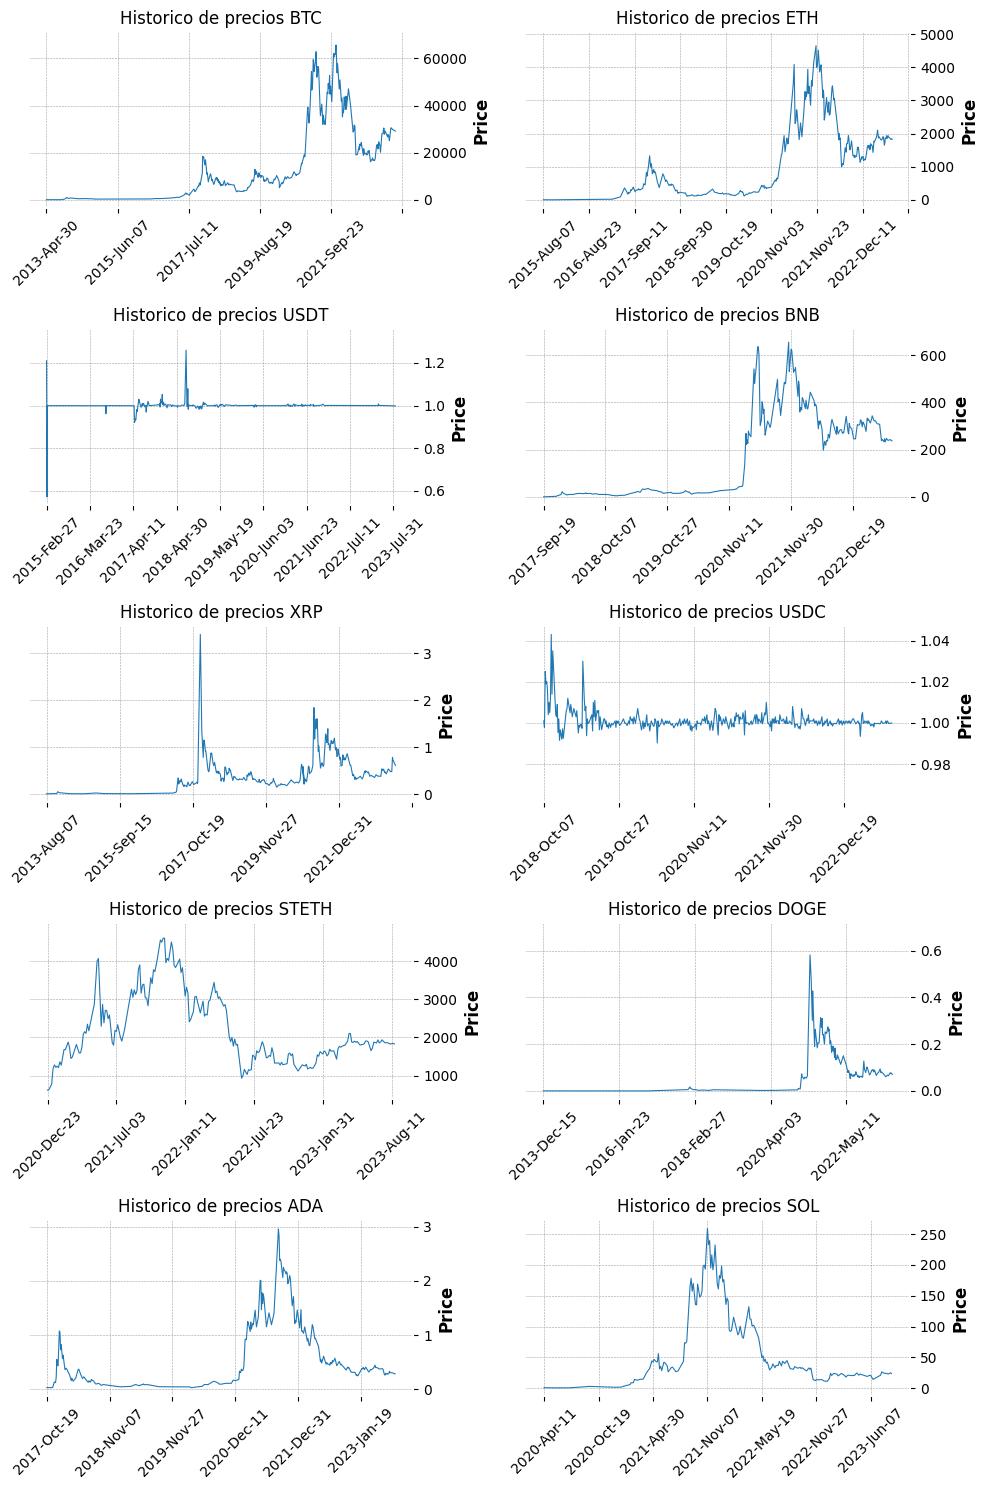

In [1050]:
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

for i, (ax, df) in enumerate(zip(axs.flatten(), ohlc_dataframes)):
    cripto_name = df['cripto'].iloc[0]
    mpf.plot(df, ax=ax, type='line', style='charles')
    ax.set_title(f'Historico de precios {cripto_name}')

plt.tight_layout()
plt.show()

Este grafico nos muestra el historico de precios de cada criptomoneda desde sus inicios, como se observa las fechas de inicio varian, algunas como el BTC, XRP y Dogecoin comenzaron en 2013 y representan las monedas mas antiguas otras como ADA, STETH y USDC son un poco mas recientes y cuentan con menos datos.

Podemos clasificarlas de forma general en 3 bloques, por un lado tenemos a las monedas mas representativas del mercado como Bitcoin y Ethereum las cuales son las mas influyentes del mercado y al tener una alta correlacion con las demas cripto podriamos decir que marcan la tendencia, podemos ver como el comportamiento de ambas es muy similar aunque hay una gran diferencia en el rango de precios donde fluctua su valor, tuvieron un maximo a fines del año 2021 y luego de eso sufrieron una abruta caida que hasta la fecha no pudieron recuperar, actualmente se encuentran aproximadamente al 50% de ese valor maximo historico.

En el segundo grupo podemos clasificar a todas las demas cripto menos las stable coins, como Cardano, Solana, Dogecoin, Steth, XRP y BNB estas criptomonedas si bien acompañan la tendencia de precios, presentan mucha mas volatilidad, esto s epuede ver a traves de los picos que muestran los graficos como por ejemplo XRP en octubre de 2017 o BNB y Dogecoin en 2020. Excepto XRP, este grupo tuvo maximos historicos entre 2020 y 2021 luego acompañaron la caida de Bitcoin y actualmente estan en un 30% o incluso un poco menos de ese valor máximo que alguna vez alcanzaron.

Por ultimo tenemos a las stablecoin, USDT y USD Coin, la particularidad que tienen estas divisas digitales es que su misión es replicar el precio del dólar, por lo que tienen la misma volatilidad que tenga el dólar americano. Esto se ve muy claro en el grafico como a pesar de algunos desvios como USDT en 2018 o USD Coin en su primer año de vida, mantienen su valor en 1.

Exportamos los datos en csv para continuar el analisis en Power Bi

In [1052]:
cripto_ohlc = pd.concat(ohlc_dataframes)

In [1053]:
cripto_ohlc.to_csv('Data/cripto_ohlc.csv', index=False)

In [904]:
market.to_csv('Data/coins_market.csv', index=False)

In [1051]:
coins_prices.to_csv('Data/coins_prices.csv', index=False)